# LINE EMISSIVITIES

These exercises make use of the PyNeb software (Luridiana et al. 2012).
For any line, the word ‘emissivity’ is taken to be the energy per emitting ion and per electron emitted in all directions for the corresponding transition. In CGS units it is expressed in erg s$^{-1}$ cm$^3$.

## Emissivities of lines from O III

##### We import some needed libraries.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pyneb as pn

In [2]:
print(pn.__version__)

1.1.1


### Find all the lines emitted by the OIII ion (O$^{++}$). Examine from what levels they are issued. For lines issued from the same level, which are the ones which will be the strongest?

##### We instantiate an Atom object for O++. It automatically contains the atomic data from a default set of files.   

In [3]:
O3 = pn.Atom('O',3)
N2 = pn.Atom('N',2)

##### We plot the Grotrian diagram for OIII

In [4]:
O3.gs

'p2'

In [5]:
print('ground state:', O3.gs)
print('ionization potential:', O3.IP)
print('IP upper:', O3.IP_up)
print('Type:', O3.type)

ground state: p2
ionization potential: 35.12111
IP upper: 54.93554
Type: coll


In [6]:
O3.getStatWeight()

array([ 1.,  3.,  5.,  5.,  1.,  5.])

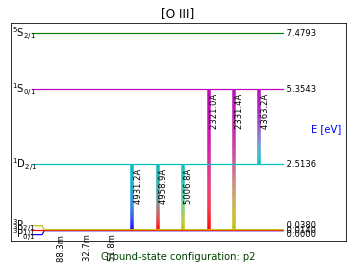

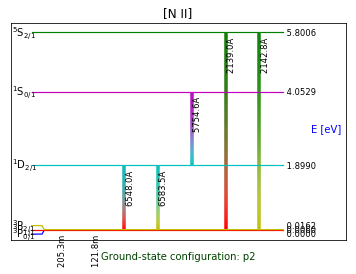

In [30]:
O3.plotGrotrian(thresh_int=0)
N2.plotGrotrian()

##### We print for each level the possible transitions and their wavelengths.

In [8]:
O3.printIonic()

elem = O
spec = 3

warng Atom O3: Cannot print populations as tem or den is missing
warng Atom O3: Cannot print critical densities as tem is missing
     88.33m 
    (2-->1) 


     32.65m      51.80m 
    (3-->1)     (3-->2) 


   4931.23A    4958.91A    5006.84A 
    (4-->1)     (4-->2)     (4-->3) 


   2314.87A    2320.95A    2331.40A    4363.21A 
    (5-->1)     (5-->2)     (5-->3)     (5-->4) 




In [24]:
N2.printIonic()

elem = N
spec = 2

warng Atom N2: Cannot print populations as tem or den is missing
warng Atom N2: Cannot print critical densities as tem is missing
    205.28m 
    (2-->1) 


     76.43m     121.77m 
    (3-->1)     (3-->2) 


   6527.23A    6548.05A    6583.45A 
    (4-->1)     (4-->2)     (4-->3) 


   3058.26A    3062.83A    3070.55A    5754.59A 
    (5-->1)     (5-->2)     (5-->3)     (5-->4) 


   2136.78A    2139.01A    2142.77A    3176.87A    7092.35A 
    (6-->1)     (6-->2)     (6-->3)     (6-->4)     (6-->5) 




In [29]:
O3.printTransition(5007)

Input wave: 5007.0
Closest wave found: 5006.8
Relative error: 3E-05 
Transition: 4 -> 3


##### We print, in addition, the transition probabilities.

### ??? For lines issued from the same level, which are the ones which will be the strongest?

In [9]:
O3.printIonic(tem=1e4, den=1e3, printA=True) 

elem = O
spec = 3
temperature = 10000.0 K
density = 1000.0 cm-3

Level   Populations  Critical densities
Level 1:  3.106E-01  0.000E+00
Level 2:  4.899E-01  5.009E+02
Level 3:  1.994E-01  3.530E+03
Level 4:  4.374E-05  6.912E+05
Level 5:  3.029E-09  2.423E+07

2.596E-05   
     88.33m 
    (2-->1) 
  2.860E-22 

3.030E-11   9.632E-05   
     32.65m      51.80m 
    (3-->1)     (3-->2) 
  3.675E-28   7.364E-22 

2.322E-06   6.791E-03   2.046E-02   
   4931.23A    4958.91A    5006.84A 
    (4-->1)     (4-->2)     (4-->3) 
  4.090E-25   1.189E-21   3.549E-21 

0.000E+00   2.255E-01   6.998E-04   1.685E+00   
   2314.87A    2320.95A    2331.40A    4363.21A 
    (5-->1)     (5-->2)     (5-->3)     (5-->4) 
  0.000E+00   5.844E-24   1.805E-26   2.323E-23 

# H-beta volume emissivity:
1.237E-25 N(H+) * N(e-)  (erg/s)


In [34]:
O3.printIonic(tem=1e5, den=1e27, printA=True) 

elem = O
spec = 3
temperature = 100000.0 K
density = 1000000000000000013287555072.0 cm-3

Level   Populations  Critical densities
Level 1:  7.550E-02  0.000E+00
Level 2:  2.261E-01  1.104E+03
Level 3:  3.758E-01  6.340E+03
Level 4:  2.820E-01  1.682E+06
Level 5:  4.056E-02  7.456E+07

2.596E-05   
     88.33m 
    (2-->1) 
  1.320E-46 

3.030E-11   9.632E-05   
     32.65m      51.80m 
    (3-->1)     (3-->2) 
  6.926E-52   1.388E-45 

2.322E-06   6.791E-03   2.046E-02   
   4931.23A    4958.91A    5006.84A 
    (4-->1)     (4-->2)     (4-->3) 
  2.637E-45   7.669E-42   2.288E-41 

0.000E+00   2.255E-01   6.998E-04   1.685E+00   
   2314.87A    2320.95A    2331.40A    4363.21A 
    (5-->1)     (5-->2)     (5-->3)     (5-->4) 
  0.000E+00   7.826E-41   2.418E-43   3.111E-40 

# H-beta volume emissivity:
NAN N(H+) * N(e-)  (erg/s)


### Compute the emissivities of all these lines between 1000 and 30000 K, at a density of ne= 100 cm$^{-3}$, and plot them. 

(-29, -19)

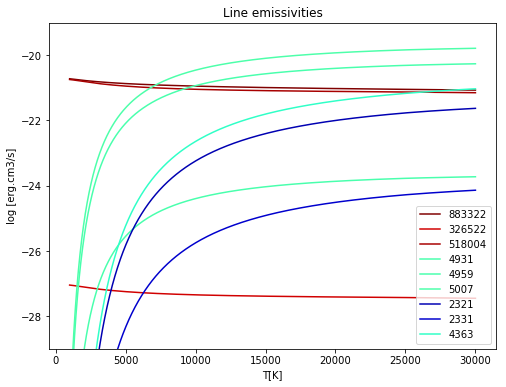

In [10]:
# We define a figure and axis objects to plot in.
f, ax = plt.subplots(figsize=(8,6))
# other possible line styles for calling the function are '--','-.',':', and '.'
O3 = pn.Atom('O',3) # We define the Atom object for O++ and  fills it with data
# O3.plotEmiss? shows all the default parameters 
O3.plotEmiss(den=1e2, ax=ax)
# by default tem_min=1000, tem_max=30000, it can be changed if needed
# function to plot the emissivities  
ax.set_ylim((-29, -19)) # change the y limits on the current plot

### ??? Which are the strongest lines at Te= 3000 K? at Te= 10000 K? at Te= 30000 K? Why?

### Do the same for	ne = 10$^5$ cm$^{-3}$.	

(-29, -19)

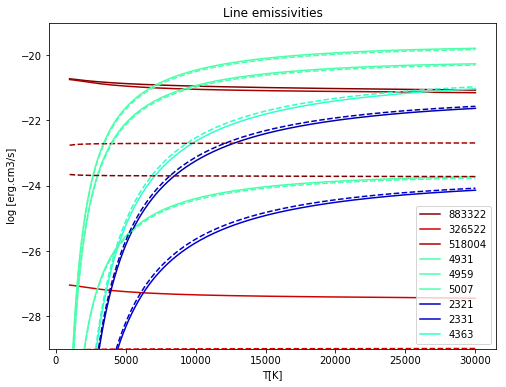

In [11]:
# We define a figure and axis objects to plot in.
f, ax = plt.subplots(figsize=(8,6))
# other possible line styles for calling the function are '--','-.',':', and '.'
O3 = pn.Atom('O',3) # We define the Atom object for O++ and  fills it with data
# O3.plotEmiss? shows all the default parameters 
O3.plotEmiss(den=1e2, ax=ax)
O3.plotEmiss(den=1e5, legend=False, style='--', ax=ax) 
# by default tem_min=1000, tem_max=30000, it can be changed if needed
# function to plot the emissivities  
ax.set_ylim((-29, -19)) # change the y limits on the current plot

### ??? What are the differences? How do they relate to the critical densities of the levels?

##### We prints the critical densities for each transition.

In [12]:
O3.printIonic(tem=10000., printCrit=True) 

elem = O
spec = 3
temperature = 10000.0 K

warng Atom O3: Cannot print populations as tem or den is missing
Critical densities
Level 1:  0.000E+00
Level 2:  5.009E+02
Level 3:  3.530E+03
Level 4:  6.912E+05
Level 5:  2.423E+07

     88.33m 
    (2-->1) 


     32.65m      51.80m 
    (3-->1)     (3-->2) 


   4931.23A    4958.91A    5006.84A 
    (4-->1)     (4-->2)     (4-->3) 


   2314.87A    2320.95A    2331.40A    4363.21A 
    (5-->1)     (5-->2)     (5-->3)     (5-->4) 




### Check the sources of atomic data that are used in the computations of the line emissivities.

##### We print the element and ionisation, with the names of the atomic data files.

In [13]:
print(O3)

Atom O3 from o_iii_atom_FFT04-SZ00.dat and o_iii_coll_SSB14.dat


##### We print the name of the atomic data file "atom" (containing Energies and transitions probabilities).

In [14]:
print(O3.atomFile)

o_iii_atom_FFT04-SZ00.dat


##### We print the name of the atomic data file "coll" (containg the Omegas).

In [15]:
print(O3.collFile)

o_iii_coll_SSB14.dat


##### We print the directory where the atomFile is read from.

In [16]:
print(O3.atomPath)

/home/mldantas/anaconda3/lib/python3.6/site-packages/pyneb/utils/../atomic_data/


##### We print the directory where the collFile is read from.

In [17]:
print(O3.collPath)

/home/mldantas/anaconda3/lib/python3.6/site-packages/pyneb/utils/../atomic_data/


##### We print the bibliographical sources from the atom and coll files.

In [35]:
O3.printSources()

O3: A values for 4-2 and 4-3: Storey and Zeippen 2000, 312, 813
O3: A-values from all levels: Froese Fischer et al 2004, ADNDT 87, 1
O3: Energy levels: 
    Ref. b'7288' of NIST 2014 (try this: http://physics.nist.gov/cgi-bin/ASBib1/get_ASBib_ref.cgi?db=el&db_id=b'7288'&comment_code=&element=O&spectr_charge=3&)
O3: Collision strengths: Storey, P. J., Sochi, T., & Badnell, N. R. 2014, A&A, 441, 3028


In [37]:
N2.printSources()

N2: A-values from all levels: Froese Fischer et al 2004, ADNDT 87, 1
N2: Energy levels: 
    Ref. b'7288' of NIST 2014 (try this: http://physics.nist.gov/cgi-bin/ASBib1/get_ASBib_ref.cgi?db=el&db_id=b'7288'&comment_code=&element=N&spectr_charge=2&)
N2: Collision strengths: Tayal 2011, ApJS, 195, 12


### Plot the values of the collision strenghts as a function of temperature for the various available sources of atomic data.

##### We first define the dataplot object, setting the ion for which atomic data data will be plotted.

In [38]:
dataplot = pn.DataPlot('O', 3)

warng _ManageAtomicData: trc data not available for O3


##### We now plot the omega values of the collisional stregths for the different atomic data that are available in PyNeb.

/home/mldantas/anaconda3/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


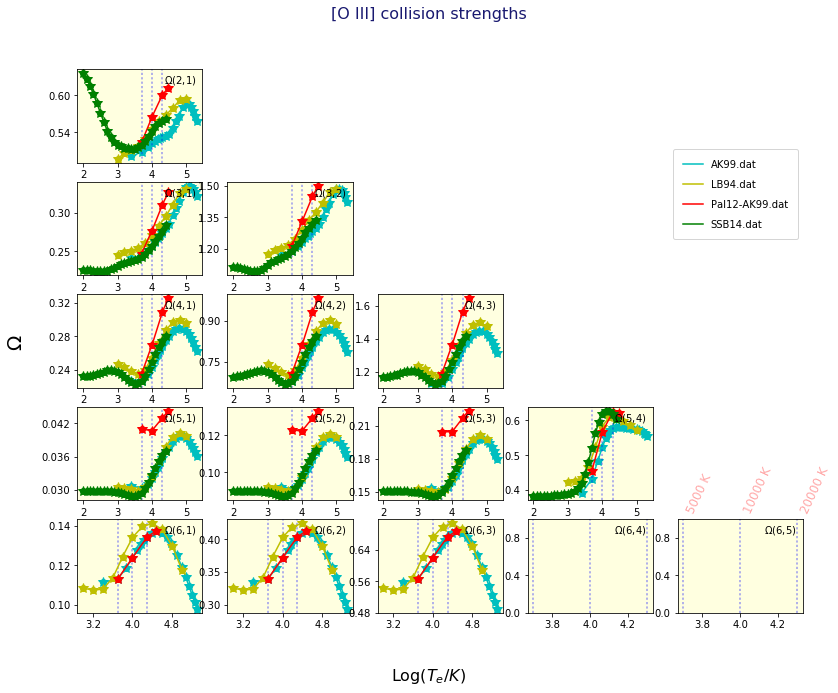

In [41]:
dataplot.plotOmega(figsize=(13,10))

### Compare the values of the Eistein coefficients A's for the various available sources of atomic data.

/home/mldantas/anaconda3/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


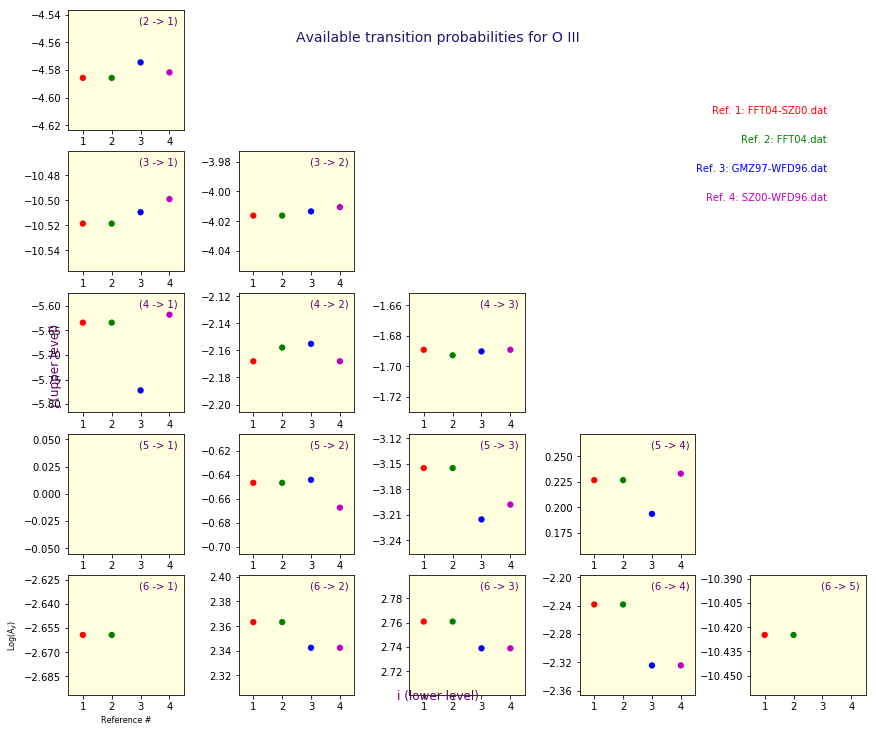

In [21]:
dataplot.plotAllA(figsize=(12,10))

warng _ManageAtomicData: trc data not available for O2


/home/mldantas/anaconda3/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


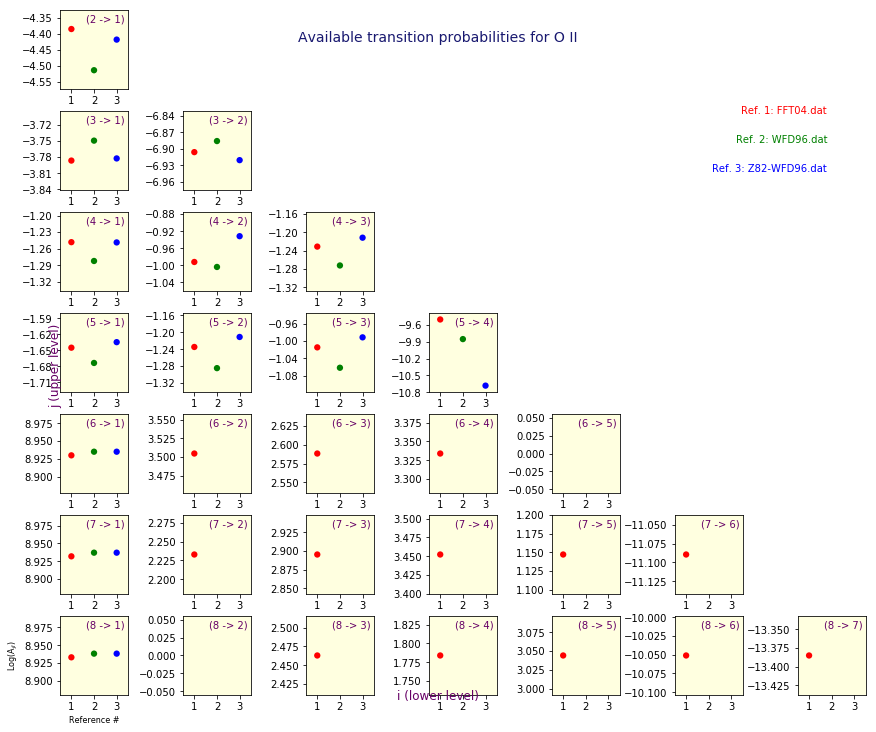

In [22]:
dataploto2 = pn.DataPlot('O', 2)
dataploto2.plotAllA(figsize=(12,10))

In [23]:
# the following is to have the nice style.
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()